In [37]:
import os
from datetime import datetime
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api import VAR

SyntaxError: invalid syntax (<ipython-input-37-85a6b244595e>, line 7)

In [2]:
df= web.DataReader("AAPL",start="2013-01-01",
                  end="2020-07-01",data_source="yahoo")

In [3]:
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,79.285713,77.375717,79.117142,78.432854,140129500.0,68.502106
2013-01-03,78.524284,77.285713,78.268570,77.442856,88241300.0,67.637436
2013-01-04,76.947144,75.118568,76.709999,75.285713,148583400.0,65.753418
2013-01-07,75.614288,73.599998,74.571426,74.842857,121039100.0,65.366646
2013-01-08,75.984283,74.464287,75.601425,75.044289,114676800.0,65.542587


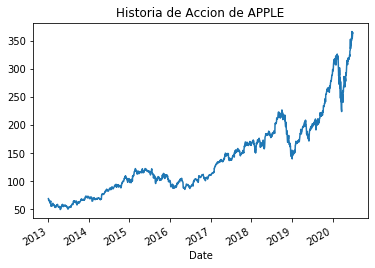

In [4]:
df["Adj Close"].plot(title="Historia de Accion de APPLE")

**Mensual**

In [5]:
y = df['Adj Close'].resample('MS').mean()
y1 = df['Open'].resample('MS').mean()
y2 = df['Low'].resample('MS').mean()

In [6]:
data= {"cierre":y,"open":y1,"low":y2}

In [7]:
df= pd.DataFrame(data)

In [8]:
df.head(2)

,cierre,open,low
Date,,,
2013-01-01,62.112956,71.440476,70.424286
2013-02-01,57.258593,65.500527,64.586617


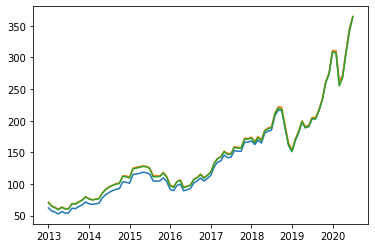

In [14]:
plt.plot(df["cierre"])
plt.plot(df["open"])
plt.plot(df["low"])

**Dividir**

In [15]:
nobs=8

In [17]:
X_train, X_test = df[0:-nobs],df[-nobs:]

In [19]:
X_test 

,cierre,open,low
Date,,,
2019-12-01,275.126224,275.391429,273.868096
2020-01-01,310.337596,311.170954,308.831430
2020-02-01,310.271843,310.313684,306.726317
2020-03-01,261.735581,261.073639,254.846363
2020-04-01,271.650839,271.811427,268.084288
2020-05-01,309.785164,308.885501,306.381000
2020-06-01,345.806360,344.541365,340.642725
2020-07-01,364.109985,365.119995,363.910004


**Evaluar si es estacionaria la serie**

In [20]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def adf_test(ts,signif=0.05):
    dftest=adfuller(ts,autolag="AIC")
    adf = pd.Series(dftest[0:4],index=["Test Estadistico","P valor","# L","# Observaciones"])
    for key, value in dftest[4].items():
        adf["Valor Criticidad(%s)"%key]=value
        print(adf)
        p=adf["P valor"]
        if p <= signif:
            print("serie es estacionaria")
        else:
            print("Seie es No Estacionaria")

In [33]:
adf_test(X_train["cierre"])

Test Estadistico         0.760527
P valor                  0.990972
# L                      3.000000
# Observaciones         79.000000
Valor Criticidad(1%)    -3.515977
dtype: float64
Seie es No Estacionaria
Test Estadistico         0.760527
P valor                  0.990972
# L                      3.000000
# Observaciones         79.000000
Valor Criticidad(1%)    -3.515977
Valor Criticidad(5%)    -2.898886
dtype: float64
Seie es No Estacionaria
Test Estadistico          0.760527
P valor                   0.990972
# L                       3.000000
# Observaciones          79.000000
Valor Criticidad(1%)     -3.515977
Valor Criticidad(5%)     -2.898886
Valor Criticidad(10%)    -2.586694
dtype: float64
Seie es No Estacionaria


**Quitamos tendencia**

In [35]:
df_diferencia = X_train.diff().dropna()

In [36]:
adf_test(df_diferencia["cierre"])

Test Estadistico        -5.335009
P valor                  0.000005
# L                      2.000000
# Observaciones         79.000000
Valor Criticidad(1%)    -3.515977
dtype: float64
serie es estacionaria
Test Estadistico        -5.335009
P valor                  0.000005
# L                      2.000000
# Observaciones         79.000000
Valor Criticidad(1%)    -3.515977
Valor Criticidad(5%)    -2.898886
dtype: float64
serie es estacionaria
Test Estadistico         -5.335009
P valor                   0.000005
# L                       2.000000
# Observaciones          79.000000
Valor Criticidad(1%)     -3.515977
Valor Criticidad(5%)     -2.898886
Valor Criticidad(10%)    -2.586694
dtype: float64
serie es estacionaria


**Modelo**

In [ ]:
modelo = VAR